# Big Mart Sales Prediction

### Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

### importing the dataset

In [2]:
# importing the test and train csv files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
## Data exploration of Train Data

In [4]:
print('dimension of train set are {}\ndimension of test set are {}\n'.format(train.shape,test.shape))

dimension of train set are (8523, 12)
dimension of test set are (5681, 11)



In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
## Extracting X and y from train dataset
X = train.iloc[:,0:-1]
y =train['Item_Outlet_Sales']
print("Xtrain shape is {}\nytrain shape is {}\n".format(X.shape,y.shape))

Xtrain shape is (8523, 11)
ytrain shape is (8523,)



In [9]:
# Outlet_Establishment_year does not carry any significance so adding the age of Outlet
# adding extra feature of Outlet_Age = max(Outlet_Establishment_Year)-(Outlet_Establishment_year)
X['Outlet_Age']=X['Outlet_Establishment_Year'].max() - X['Outlet_Establishment_Year']

In [10]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,10
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,10
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,11
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,22


In [11]:
# at first droping item identifier , outlet_identifier , outlet establishment year
X = X.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [12]:
### Item visibilty of 0 does not make any sense so imputing these 0 values with nan

In [13]:
X['Item_Visibility']=X['Item_Visibility'].mask(X['Item_Visibility']==0.0)

In [14]:
# missing values
X.isna().sum()

Item_Weight             1463
Item_Fat_Content           0
Item_Visibility          526
Item_Type                  0
Item_MRP                   0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Outlet_Age                 0
dtype: int64

In [15]:
### missing values imputation

In [16]:
X['Item_Weight'].fillna(X['Item_Weight'].mean(),inplace=True)
X['Outlet_Size'].fillna(X['Outlet_Size'].mode()[0],inplace=True)
X['Item_Visibility'].fillna(X['Item_Visibility'].mean(),inplace=True)

In [17]:
X.isna().sum()


Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Outlet_Age              0
dtype: int64

In [18]:
# checking the categorical variables
X['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [19]:
# Unifying categories to Low Fat and Regular only
X['Item_Fat_Content'] = X['Item_Fat_Content'].replace({'reg':'Regular', 'LF':'Low Fat','low fat':'Low Fat'})

In [20]:
X['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
# Label encoding the categorical variables.

In [22]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
X['Item_Fat_Content']=label_encoder.fit_transform(X['Item_Fat_Content']) 
#,'Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'
X['Outlet_Size']=label_encoder.fit_transform(X['Outlet_Size'])
X['Outlet_Location_Type']=label_encoder.fit_transform(X['Outlet_Location_Type'])
X['Outlet_Type']=label_encoder.fit_transform(X['Outlet_Type'])
X['Item_Type']=label_encoder.fit_transform(X['Item_Type'])
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,9.30,0,0.016047,4,249.8092,1,0,1,10
1,5.92,1,0.019278,14,48.2692,1,2,2,0
2,17.50,0,0.016760,10,141.6180,1,0,1,10
3,19.20,1,0.070482,6,182.0950,1,2,0,11
4,8.93,0,0.070482,9,53.8614,0,2,1,22


In [23]:
### checking correlation to check if there is any highly correlated variable
X.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
Item_Weight,1.000000,-0.021157,-0.017763,0.028015,0.024756,-0.007225,0.004088,-0.000566,0.008301
Item_Fat_Content,-0.021157,1.000000,0.049915,-0.139434,0.006063,-0.000622,-0.001598,0.002199,-0.003151
Item_Visibility,-0.017763,0.049915,1.000000,-0.035922,-0.005515,0.072297,-0.027742,-0.179380,0.078316
Item_Type,0.028015,-0.139434,-0.035922,1.000000,0.032651,-0.001859,0.003084,0.003053,-0.004970
Item_MRP,0.024756,0.006063,-0.005515,0.032651,1.000000,0.006059,0.000232,-0.001975,-0.005020
Outlet_Size,-0.007225,-0.000622,0.072297,-0.001859,0.006059,1.000000,-0.614311,-0.201483,-0.193389
Outlet_Location_Type,0.004088,-0.001598,-0.027742,0.003084,0.000232,-0.614311,1.000000,0.467219,0.089216
Outlet_Type,-0.000566,0.002199,-0.179380,0.003053,-0.001975,-0.201483,0.467219,1.000000,0.122304
Outlet_Age,0.008301,-0.003151,0.078316,-0.004970,-0.005020,-0.193389,0.089216,0.122304,1.000000


In [24]:
print("X shape is {} \ny shape is {} \n".format(X.shape,y.shape))

X shape is (8523, 9) 
y shape is (8523,) 



In [25]:
#normalizing the X from 0 to 1 using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X=min_max_scaler.fit_transform(X)
X[:5]

array([[0.28252456, 0.        , 0.03839895, 0.26666667, 0.92750715,
        0.5       , 0.        , 0.33333333, 0.41666667],
       [0.08127419, 1.        , 0.04834585, 0.93333333, 0.0720684 ,
        0.5       , 1.        , 0.66666667, 0.        ],
       [0.77076511, 0.        , 0.04059334, 0.66666667, 0.46828841,
        0.5       , 0.        , 0.33333333, 0.41666667],
       [0.87198571, 1.        , 0.20598459, 0.4       , 0.64009348,
        0.5       , 1.        , 0.        , 0.45833333],
       [0.26049419, 0.        , 0.20598459, 0.6       , 0.09580456,
        0.        , 1.        , 0.33333333, 0.91666667]])

In [26]:
# Test Train split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size = 0.3 ,shuffle = True,random_state =0)
print(X_train.shape,y_train.shape);print(X_test.shape,y_test.shape)

(5966, 9) (5966,)
(2557, 9) (2557,)


In [27]:
# Building the Model using Keras
from keras.models import Sequential
# importing different layers from keras
from keras.layers import InputLayer, Dense , Dropout
from keras.optimizers import Adam,RMSprop
from keras.regularizers import l2

Using TensorFlow backend.


In [28]:
# defining the input and output neurons
input_neurons = X_train.shape[1]
output_neurons = 1

In [29]:
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=500,activation='relu',name='Input_Layer1'))
model.add(Dense(units=100,activation='relu',name='hidden_Layer1'))
model.add(Dropout(0.5))
model.add(Dense(units=50,activation='relu',name='hidden_Layer2'))
model.add(Dense(units=output_neurons,activation='linear',name ='output_Layer'))
model.compile(loss= "MSE" , optimizer="RMSprop", metrics=["MAE"])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer1 (Dense)         (None, 500)               5000      
_________________________________________________________________
hidden_Layer1 (Dense)        (None, 100)               50100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
hidden_Layer2 (Dense)        (None, 50)                5050      
_________________________________________________________________
output_Layer (Dense)         (None, 1)                 51        
Total params: 60,201
Trainable params: 60,201
Non-trainable params: 0
_________________________________________________________________


In [31]:
# removing history from memory
#del history
# training the model
history = model.fit(X_train, y_train, epochs=500, batch_size=len(X_train),validation_data =(X_test,y_test), verbose=1)

Train on 5966 samples, validate on 2557 samples
Epoch 1/500
5966/5966 [==============================] - 0s 43us/step - loss: 7552145.0000 - MAE: 2167.5083 - val_loss: 7943217.5000 - val_MAE: 2213.1902
Epoch 2/500
5966/5966 [==============================] - 0s 17us/step - loss: 7550425.5000 - MAE: 2167.1296 - val_loss: 7941076.5000 - val_MAE: 2212.7241
Epoch 3/500
5966/5966 [==============================] - 0s 17us/step - loss: 7548353.5000 - MAE: 2166.6687 - val_loss: 7938379.0000 - val_MAE: 2212.1357
Epoch 4/500
5966/5966 [==============================] - 0s 20us/step - loss: 7545654.0000 - MAE: 2166.0654 - val_loss: 7935051.5000 - val_MAE: 2211.4106
Epoch 5/500
5966/5966 [==============================] - 0s 19us/step - loss: 7542359.0000 - MAE: 2165.3311 - val_loss: 7930947.5000 - val_MAE: 2210.5161
Epoch 6/500
5966/5966 [==============================] - 0s 17us/step - loss: 7538328.0000 - MAE: 2164.4226 - val_loss: 7925933.0000 - val_MAE: 2209.4231
Epoch 7/500
5966/5966 [=====

Epoch 54/500
5966/5966 [==============================] - 0s 16us/step - loss: 5320279.5000 - MAE: 1687.2472 - val_loss: 5554897.0000 - val_MAE: 1716.1598
Epoch 55/500
5966/5966 [==============================] - 0s 16us/step - loss: 5231568.5000 - MAE: 1668.8242 - val_loss: 5464679.0000 - val_MAE: 1698.9772
Epoch 56/500
5966/5966 [==============================] - 0s 15us/step - loss: 5164988.0000 - MAE: 1654.2700 - val_loss: 5374462.5000 - val_MAE: 1681.8544
Epoch 57/500
5966/5966 [==============================] - 0s 17us/step - loss: 5054418.0000 - MAE: 1634.6830 - val_loss: 5282860.0000 - val_MAE: 1664.5660
Epoch 58/500
5966/5966 [==============================] - 0s 16us/step - loss: 4978385.5000 - MAE: 1616.9357 - val_loss: 5191313.5000 - val_MAE: 1647.3602
Epoch 59/500
5966/5966 [==============================] - 0s 16us/step - loss: 4883179.0000 - MAE: 1600.7504 - val_loss: 5099231.0000 - val_MAE: 1630.2280
Epoch 60/500
5966/5966 [==============================] - 0s 18us/step

Epoch 107/500
5966/5966 [==============================] - 0s 16us/step - loss: 2691958.7500 - MAE: 1271.4307 - val_loss: 2730462.5000 - val_MAE: 1294.0674
Epoch 108/500
5966/5966 [==============================] - 0s 16us/step - loss: 2655800.2500 - MAE: 1263.7950 - val_loss: 2725972.2500 - val_MAE: 1293.7250
Epoch 109/500
5966/5966 [==============================] - 0s 17us/step - loss: 2667082.0000 - MAE: 1269.7603 - val_loss: 2721931.2500 - val_MAE: 1293.1742
Epoch 110/500
5966/5966 [==============================] - 0s 18us/step - loss: 2665906.7500 - MAE: 1273.3044 - val_loss: 2717783.7500 - val_MAE: 1292.6566
Epoch 111/500
5966/5966 [==============================] - 0s 16us/step - loss: 2663610.5000 - MAE: 1267.1555 - val_loss: 2713128.7500 - val_MAE: 1292.3182
Epoch 112/500
5966/5966 [==============================] - 0s 16us/step - loss: 2661986.2500 - MAE: 1271.1907 - val_loss: 2709525.5000 - val_MAE: 1291.3937
Epoch 113/500
5966/5966 [==============================] - 0s 15

Epoch 160/500
5966/5966 [==============================] - 0s 17us/step - loss: 2371610.0000 - MAE: 1198.9646 - val_loss: 2399520.2500 - val_MAE: 1219.7081
Epoch 161/500
5966/5966 [==============================] - 0s 15us/step - loss: 2357210.2500 - MAE: 1196.9020 - val_loss: 2389656.5000 - val_MAE: 1217.6371
Epoch 162/500
5966/5966 [==============================] - 0s 16us/step - loss: 2352469.5000 - MAE: 1198.0497 - val_loss: 2381803.5000 - val_MAE: 1214.2100
Epoch 163/500
5966/5966 [==============================] - 0s 15us/step - loss: 2342766.7500 - MAE: 1196.5419 - val_loss: 2370613.7500 - val_MAE: 1212.7006
Epoch 164/500
5966/5966 [==============================] - 0s 16us/step - loss: 2313860.7500 - MAE: 1187.3826 - val_loss: 2362602.7500 - val_MAE: 1209.2896
Epoch 165/500
5966/5966 [==============================] - 0s 16us/step - loss: 2324881.0000 - MAE: 1186.4786 - val_loss: 2349968.7500 - val_MAE: 1208.5759
Epoch 166/500
5966/5966 [==============================] - 0s 16

Epoch 213/500
5966/5966 [==============================] - 0s 16us/step - loss: 1819434.8750 - MAE: 1029.9589 - val_loss: 1801889.2500 - val_MAE: 1039.4860
Epoch 214/500
5966/5966 [==============================] - 0s 17us/step - loss: 1780581.1250 - MAE: 1015.9677 - val_loss: 1789584.6250 - val_MAE: 1036.4723
Epoch 215/500
5966/5966 [==============================] - 0s 18us/step - loss: 1770673.6250 - MAE: 1018.6157 - val_loss: 1780635.2500 - val_MAE: 1030.9037
Epoch 216/500
5966/5966 [==============================] - 0s 16us/step - loss: 1738637.5000 - MAE: 1001.9247 - val_loss: 1769474.3750 - val_MAE: 1027.1097
Epoch 217/500
5966/5966 [==============================] - 0s 17us/step - loss: 1759125.7500 - MAE: 1010.2305 - val_loss: 1760435.0000 - val_MAE: 1022.1797
Epoch 218/500
5966/5966 [==============================] - 0s 16us/step - loss: 1741542.5000 - MAE: 1001.8824 - val_loss: 1749122.7500 - val_MAE: 1018.9331
Epoch 219/500
5966/5966 [==============================] - 0s 17

5966/5966 [==============================] - 0s 16us/step - loss: 1548035.0000 - MAE: 908.0208 - val_loss: 1501548.3750 - val_MAE: 912.0630
Epoch 267/500
5966/5966 [==============================] - 0s 17us/step - loss: 1546161.7500 - MAE: 905.5739 - val_loss: 1494504.1250 - val_MAE: 913.3149
Epoch 268/500
5966/5966 [==============================] - 0s 15us/step - loss: 1531121.1250 - MAE: 908.0424 - val_loss: 1504973.2500 - val_MAE: 910.3105
Epoch 269/500
5966/5966 [==============================] - 0s 17us/step - loss: 1518812.8750 - MAE: 897.3329 - val_loss: 1490106.8750 - val_MAE: 913.4103
Epoch 270/500
5966/5966 [==============================] - 0s 15us/step - loss: 1523221.0000 - MAE: 901.5323 - val_loss: 1507098.3750 - val_MAE: 909.1855
Epoch 271/500
5966/5966 [==============================] - 0s 17us/step - loss: 1526084.0000 - MAE: 893.8719 - val_loss: 1486470.8750 - val_MAE: 914.4532
Epoch 272/500
5966/5966 [==============================] - 0s 16us/step - loss: 1527922.25

Epoch 320/500
5966/5966 [==============================] - 0s 17us/step - loss: 1517173.2500 - MAE: 895.0103 - val_loss: 1482467.5000 - val_MAE: 897.3336
Epoch 321/500
5966/5966 [==============================] - 0s 16us/step - loss: 1506234.6250 - MAE: 887.8875 - val_loss: 1463904.1250 - val_MAE: 901.0564
Epoch 322/500
5966/5966 [==============================] - 0s 16us/step - loss: 1496147.3750 - MAE: 893.7785 - val_loss: 1486399.1250 - val_MAE: 896.8495
Epoch 323/500
5966/5966 [==============================] - 0s 16us/step - loss: 1516522.3750 - MAE: 891.0693 - val_loss: 1462531.2500 - val_MAE: 901.4615
Epoch 324/500
5966/5966 [==============================] - 0s 16us/step - loss: 1514870.7500 - MAE: 900.9139 - val_loss: 1489180.8750 - val_MAE: 896.5051
Epoch 325/500
5966/5966 [==============================] - 0s 16us/step - loss: 1520103.2500 - MAE: 889.5276 - val_loss: 1461530.3750 - val_MAE: 901.4115
Epoch 326/500
5966/5966 [==============================] - 0s 17us/step - lo

Epoch 374/500
5966/5966 [==============================] - 0s 16us/step - loss: 1457358.1250 - MAE: 875.1224 - val_loss: 1453338.8750 - val_MAE: 887.4103
Epoch 375/500
5966/5966 [==============================] - 0s 15us/step - loss: 1472570.1250 - MAE: 875.2096 - val_loss: 1443895.1250 - val_MAE: 889.1260
Epoch 376/500
5966/5966 [==============================] - 0s 17us/step - loss: 1468058.6250 - MAE: 877.6289 - val_loss: 1458901.0000 - val_MAE: 886.4407
Epoch 377/500
5966/5966 [==============================] - 0s 17us/step - loss: 1462288.8750 - MAE: 872.3232 - val_loss: 1440292.0000 - val_MAE: 890.7659
Epoch 378/500
5966/5966 [==============================] - 0s 16us/step - loss: 1483387.1250 - MAE: 883.1684 - val_loss: 1462254.8750 - val_MAE: 886.0096
Epoch 379/500
5966/5966 [==============================] - 0s 17us/step - loss: 1490245.3750 - MAE: 877.7620 - val_loss: 1438172.0000 - val_MAE: 892.8270
Epoch 380/500
5966/5966 [==============================] - 0s 16us/step - lo

Epoch 428/500
5966/5966 [==============================] - 0s 17us/step - loss: 1461916.7500 - MAE: 866.6316 - val_loss: 1411786.8750 - val_MAE: 879.6597
Epoch 429/500
5966/5966 [==============================] - 0s 17us/step - loss: 1427668.0000 - MAE: 868.4472 - val_loss: 1434368.5000 - val_MAE: 873.1766
Epoch 430/500
5966/5966 [==============================] - 0s 16us/step - loss: 1448960.1250 - MAE: 865.1130 - val_loss: 1410163.7500 - val_MAE: 879.8562
Epoch 431/500
5966/5966 [==============================] - 0s 16us/step - loss: 1471232.7500 - MAE: 882.2632 - val_loss: 1438852.6250 - val_MAE: 872.8353
Epoch 432/500
5966/5966 [==============================] - 0s 17us/step - loss: 1455945.2500 - MAE: 868.9811 - val_loss: 1410560.1250 - val_MAE: 876.8474
Epoch 433/500
5966/5966 [==============================] - 0s 16us/step - loss: 1434642.2500 - MAE: 868.2217 - val_loss: 1420769.2500 - val_MAE: 872.7354
Epoch 434/500
5966/5966 [==============================] - 0s 16us/step - lo

Epoch 482/500
5966/5966 [==============================] - 0s 16us/step - loss: 1458196.6250 - MAE: 867.1306 - val_loss: 1394458.8750 - val_MAE: 858.0045
Epoch 483/500
5966/5966 [==============================] - 0s 17us/step - loss: 1410859.7500 - MAE: 847.0454 - val_loss: 1379661.8750 - val_MAE: 860.2425
Epoch 484/500
5966/5966 [==============================] - 0s 18us/step - loss: 1412758.3750 - MAE: 854.6602 - val_loss: 1389669.0000 - val_MAE: 857.7430
Epoch 485/500
5966/5966 [==============================] - 0s 16us/step - loss: 1421179.8750 - MAE: 849.7037 - val_loss: 1378059.2500 - val_MAE: 859.9083
Epoch 486/500
5966/5966 [==============================] - 0s 16us/step - loss: 1379258.3750 - MAE: 846.1422 - val_loss: 1386288.3750 - val_MAE: 857.4430
Epoch 487/500
5966/5966 [==============================] - 0s 17us/step - loss: 1440600.0000 - MAE: 853.9812 - val_loss: 1377711.1250 - val_MAE: 859.0546
Epoch 488/500
5966/5966 [==============================] - 0s 16us/step - lo

In [32]:
pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

1135.5845272692366


In [33]:
model.evaluate(X_train,y_train)

5966/5966 [==============================] - 0s 34us/step


[1289552.2218823333, 814.5740966796875]

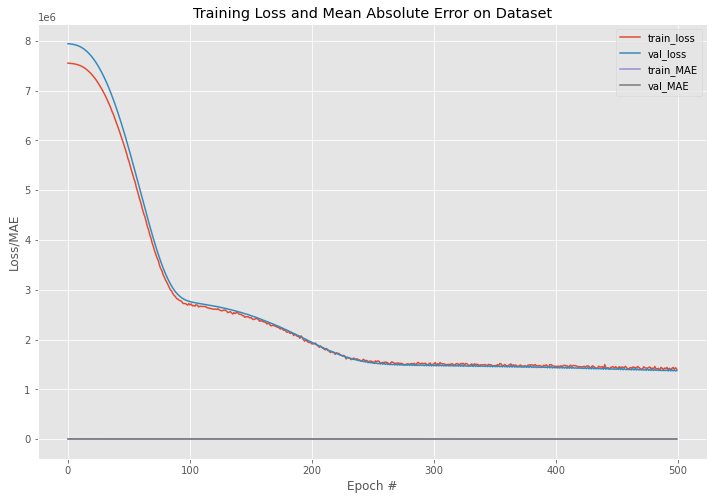

In [34]:
# plot the training loss and accuracy
N = np.arange(0, 500)
plt.style.use("ggplot")
plt.figure(figsize=(12, 8))
#plt.figure(figure)
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["MAE"], label="train_MAE")
plt.plot(N, history.history["val_MAE"], label="val_MAE")
plt.title("Training Loss and Mean Absolute Error on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/MAE")
plt.legend(loc="upper right")
#plt.savefig(args["plot"])

In [35]:
# Applying the same transformations to test dataset
# Outlet_Establishment_year does not carry any significance so adding the age of Outlet
# adding extra feature of Outlet_Age = max(Outlet_Establishment_Year)-(Outlet_Establishment_year)
test['Outlet_Age']=test['Outlet_Establishment_Year'].max() - test['Outlet_Establishment_Year']

In [36]:
submission = test[['Item_Identifier','Outlet_Identifier']].copy()

In [37]:
# at first droping item identifier , outlet_identifier , outlet establishment year
test = test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [38]:
test['Item_Visibility']=test['Item_Visibility'].mask(test['Item_Visibility']==0.0)

In [39]:
test.isna().sum()

Item_Weight              976
Item_Fat_Content           0
Item_Visibility          353
Item_Type                  0
Item_MRP                   0
Outlet_Size             1606
Outlet_Location_Type       0
Outlet_Type                0
Outlet_Age                 0
dtype: int64

In [40]:
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)
test['Item_Visibility'].fillna(test['Item_Visibility'].mean(),inplace=True)

In [41]:
# checking the categorical variables
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [42]:
# Unifying categories to Low Fat and Regular only
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'reg':'Regular', 'LF':'Low Fat','low fat':'Low Fat'})

In [43]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
test['Item_Fat_Content']=label_encoder.fit_transform(test['Item_Fat_Content']) 
#,'Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'
test['Outlet_Size']=label_encoder.fit_transform(test['Outlet_Size'])
test['Outlet_Location_Type']=label_encoder.fit_transform(test['Outlet_Location_Type'])
test['Outlet_Type']=label_encoder.fit_transform(test['Outlet_Type'])
test['Item_Type']=label_encoder.fit_transform(test['Item_Type'])
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,20.750000,0,0.007565,13,107.8622,1,0,1,10
1,8.300000,1,0.038428,4,87.3198,1,1,1,2
2,14.600000,0,0.099575,11,241.7538,1,2,0,11
3,7.315000,0,0.015388,13,155.0340,1,1,1,2
4,12.695633,1,0.118599,4,234.2300,1,2,3,24


In [44]:
#normalizing the test from 0 to 1 using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
test=min_max_scaler.fit_transform(test)
test[:5]

array([[0.96427508, 0.        , 0.01241517, 0.86666667, 0.32341312,
        0.5       , 0.        , 0.33333333, 0.41666667],
       [0.22298303, 1.        , 0.10884773, 0.26666667, 0.23584901,
        0.5       , 0.5       , 0.33333333, 0.08333333],
       [0.59809467, 0.        , 0.29990547, 0.73333333, 0.89413994,
        0.5       , 1.        , 0.        , 0.45833333],
       [0.16433462, 0.        , 0.03686028, 0.86666667, 0.52448781,
        0.5       , 0.5       , 0.33333333, 0.08333333],
       [0.48470577, 1.        , 0.35934822, 0.26666667, 0.86206897,
        0.5       , 1.        , 1.        , 1.        ]])

In [45]:
predictions = model.predict(test)

In [46]:
submission['Item_Outlet_Sales']=predictions
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1922.841309
1,FDW14,OUT017,1216.849609
2,NCN55,OUT010,1504.466797
3,FDQ58,OUT017,2287.141357
4,FDY38,OUT027,5254.823730
...,...,...,...
5676,FDB58,OUT046,2284.740479
5677,FDD47,OUT018,2846.597412
5678,NCO17,OUT045,1440.291748
5679,FDJ26,OUT017,3165.809814


In [47]:
submission.to_csv('submission.csv',index=False)